# Z-оценка

In [ ]:
import pandas as pd
import scipy.stats
import numpy as np

In [ ]:
eng = pd.read_csv('eng_test.csv', sep=';')
eng.head()

,Id,Exam,Score,Advanced
0,ID1,TOEFL,77.0,NO
1,ID10,TOEFL,105.0,NO
2,ID100,TOEFL,107.0,YES
3,ID101,TOEFL,72.0,NO
4,ID102,TOEFL,120.0,YES


<Axes: >

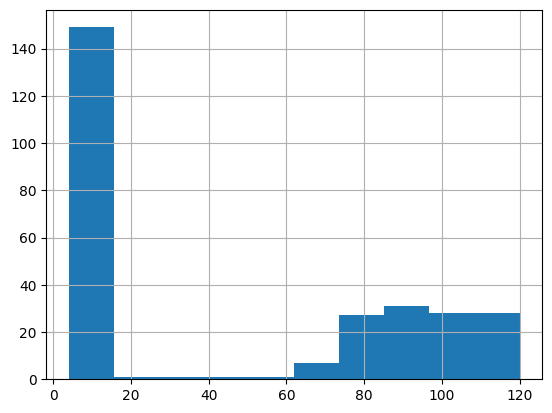

In [ ]:
eng['Score'].hist()

Получился странный график, потому что у двух экзаменов разные шкалы оценивания.

In [ ]:
# какие значения в Exam?
eng['Exam'].unique()

array(['TOEFL', 'IELTS'], dtype=object)

In [ ]:
# выведем статистику только про 'TOEFL'
toefl = eng[eng['Exam'] == 'TOEFL']
toefl.describe()

,Score
count,125.000000
mean,93.776000
std,17.903804
min,25.000000
25%,81.000000
50%,94.000000
75%,107.000000
max,120.000000


<Axes: >

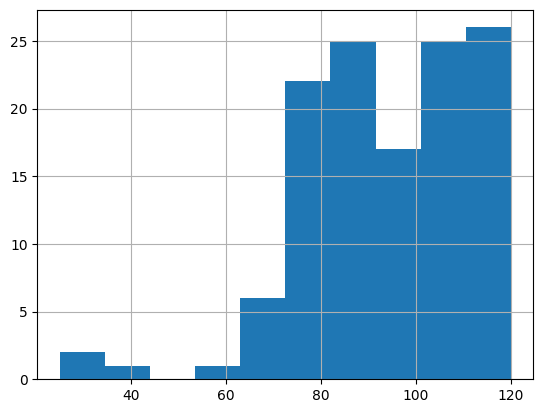

In [ ]:
toefl['Score'].hist()

In [ ]:
# а теперь про ielts
ielts = eng[eng['Exam'] == 'IELTS']
ielts.describe()

,Score
count,149.000000
mean,6.432886
std,1.571126
min,4.000000
25%,5.000000
50%,6.500000
75%,8.000000
max,9.000000


<Axes: >

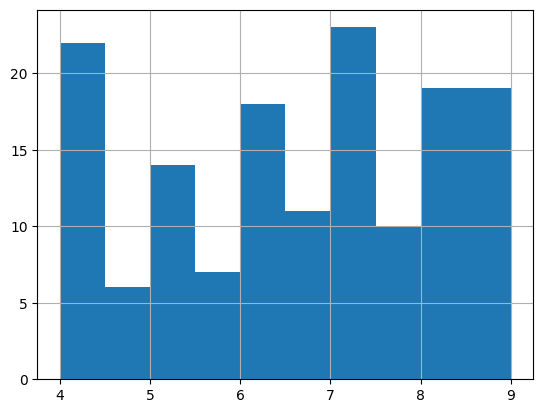

In [ ]:
ielts['Score'].hist()

Получается, что у нас два распределения. От 0 до 10 и от 0 до 120. С разным средним и разным стандартным отклонением. Как делать выводы, кто молодец?

Что лучше: 7 из 10 или 84 из 120?

(и то, и другое - решение 70% экзамена, но получается, что первый решил лучше среднего и медианы, а второй хуже)

Как привести к единой шкале?

Идея: перевести наши значения в расстояние до среднего в сигмах (в стандартных отклонениях)

Воспоминание про стандартное отклонение:

![формула](https://raw.githubusercontent.com/tbkazakova/compling_for_lyceum/main/pic/std_formula.png)
![картинка](https://raw.githubusercontent.com/tbkazakova/compling_for_lyceum/main/pic/std.png)

Формула z-оценки: `𝑧 = (𝑋 – μ)/σ`

μ - математическое ожидание, среднее

In [ ]:
# вот студент с оценкой за экзамен
X = toefl['Score'][0]
X
# посчитаем z-оценку для него

77.0

In [ ]:
# вот среднее за экзамен
M = toefl['Score'].mean()
M

93.776

In [ ]:
# вот стандартное отклонение
sigma = toefl['Score'].std(ddof=0)
sigma

17.832044863110905

In [ ]:
# вот z-оценка
z_score = (X - M) / sigma
z_score

-0.9407782522297515

В обратную сторону тоже легко: `𝑋 = μ + 𝑧*σ`

In [ ]:
# вот такая z-оценка
z_new = 1.4706109

# какая оценка за toefl?
X_new = M + z_new * sigma
print(X_new)

119.9999995449799


Если перевести все значения в z-оценки, получится `z-распределение` (или стандартизированное).

Среднее в нем будет равно нулю, а среднеквадратичное отклонение — единице.

`scipy.stats.zscore()` - для z-оценки

In [ ]:
scipy.stats.zscore(toefl['Score'])

0     -0.940778
1      0.629429
2      0.741586
3     -1.221172
4      1.470611
         ...   
269   -0.323911
270   -0.211754
271   -0.211754
272   -2.230591
273    0.685507
Name: Score, Length: 125, dtype: float64

Посмотрим на toefl и ielts

In [ ]:
toefl['z-score'] = scipy.stats.zscore(toefl.loc[:,'Score'])

<ipython-input-6-67afc134f386>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toefl['z-score'] = scipy.stats.zscore(toefl.loc[:,'Score'])


In [ ]:
ielts['z-score'] = scipy.stats.zscore(ielts.loc[:,'Score'])

<ipython-input-7-206726ba58e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ielts['z-score'] = scipy.stats.zscore(ielts.loc[:,'Score'])


In [ ]:
ielts

,Id,Exam,Score,Advanced,z-score
30,ID126,IELTS,9.0,YES,1.639443
31,ID127,IELTS,5.0,NO,-0.915088
32,ID128,IELTS,7.5,YES,0.681494
33,ID129,IELTS,5.0,NO,-0.915088
35,ID130,IELTS,4.0,NO,-1.553720
...,...,...,...,...,...
190,ID270,IELTS,8.0,YES,1.000810
191,ID271,IELTS,6.5,NO,0.042861
192,ID272,IELTS,4.0,NO,-1.553720
193,ID273,IELTS,7.0,YES,0.362178


In [ ]:
eng = pd.concat([toefl, ielts])

In [ ]:
eng

,Id,Exam,Score,Advanced,z-score
0,ID1,TOEFL,77.0,NO,-0.940778
1,ID10,TOEFL,105.0,NO,0.629429
2,ID100,TOEFL,107.0,YES,0.741586
3,ID101,TOEFL,72.0,NO,-1.221172
4,ID102,TOEFL,120.0,YES,1.470611
...,...,...,...,...,...
190,ID270,IELTS,8.0,YES,1.000810
191,ID271,IELTS,6.5,NO,0.042861
192,ID272,IELTS,4.0,NO,-1.553720
193,ID273,IELTS,7.0,YES,0.362178


Теперь все результаты можно изобразить на одном графике

<Axes: >

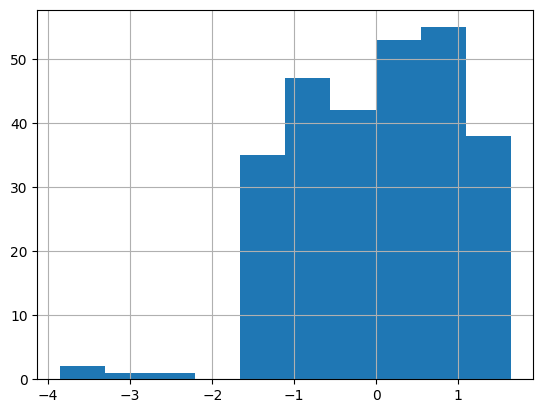

In [ ]:
eng['z-score'].hist()

In [ ]:
# Кто в 0.1 сдавших хуже всего?
eng[eng['z-score'] < -3]

,Id,Exam,Score,Advanced,z-score
25,ID121,TOEFL,32.0,NO,-3.464325
27,ID123,TOEFL,25.0,YES,-3.856877


In [ ]:
# Лучше сдала Advanced группа? (посмотреть среднее по группам)
eng.groupby('Advanced')['z-score'].mean()

Advanced
NO    -0.397672
YES    0.440499
Name: z-score, dtype: float64